# Lorenz Equations

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [3]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [4]:
def lorenz(x,t):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    om = 10
    ro = 28
    beta = 8/3
    return om*(x[1]-x[0]),(ro*x[0])-x[1]-(x[0]*x[2]),(x[0]*x[1])-(beta*x[2])

<IPython.core.display.Javascript object>


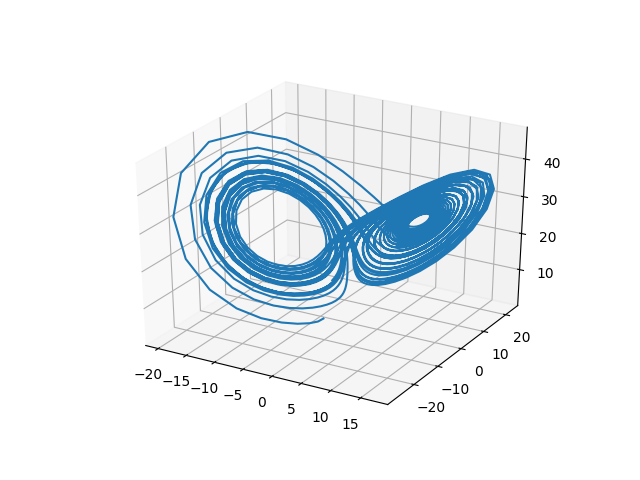

In [5]:
initial = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
lmbda = np.linspace(0,50,2000)
#solve the lorenze equation with random initial condition
vals = odeint(lorenz,initial,lmbda)

ax = plt.axes(projection='3d')
#make a 3d plot to graph
ax.plot3D([x[0] for x in vals[:]],[x[1] for x in vals[:]],[x[2] for x in vals[:]])
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


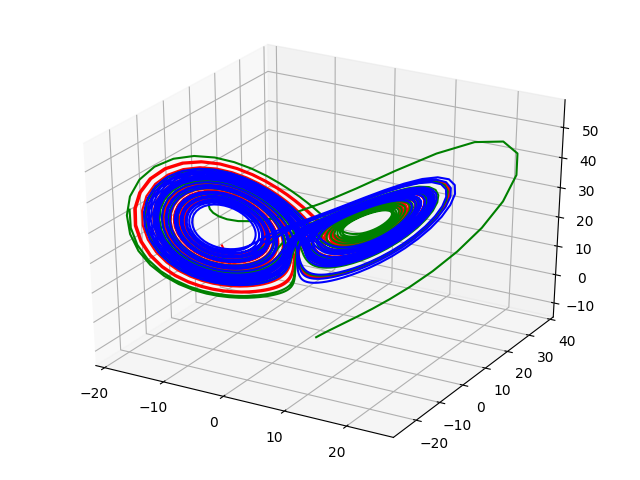

In [6]:
initial = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
lmbda = np.linspace(0,30,2000)
vals = odeint(lorenz,initial,lmbda)
#make one plot to use for 3 different solutions
ax = plt.axes(projection='3d')
#solve and plot each of the solutions
ax.plot3D([x[0] for x in vals[:]],[x[1] for x in vals[:]],[x[2] for x in vals[:]],color='r')
initial = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
lmbda = np.linspace(0,30,2000)
vals = odeint(lorenz,initial,lmbda)
ax.plot3D([x[0] for x in vals[:]],[x[1] for x in vals[:]],[x[2] for x in vals[:]],color='g')
initial = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
lmbda = np.linspace(0,30,2000)
vals = odeint(lorenz,initial,lmbda)
ax.plot3D([x[0] for x in vals[:]],[x[1] for x in vals[:]],[x[2] for x in vals[:]],color="b")
plt.tight_layout()
plt.show()


## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [51]:
initial = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
initiald = initial - np.random.randn(3)*(1e-10)
#lmbda = np.linspace(0,30,2000)
#vals = odeint(lorenz,initial,lmbda)
#vald = odeint(lorenz,initiald,lmbda)
lmbda = np.linspace(0,60,3000)
vals = odeint(lorenz,initial,lmbda)
vald = odeint(lorenz,initiald,lmbda)
#this code is kind of a mess because i had some things go wrong
#i made it work eventually. the problem was that i didnt run a box at the top
#so the 3d animation is made a bit differently than you might have seen

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
lorenz1_dot, = ax.plot([],[],[],'C0o')
lorenz1_path, = ax.plot([],[],[],'C0-')
lorenz2_dot, = ax.plot([],[],[],'C2o')
lorenz2_path, = ax.plot([],[],[],'C2-')
#right around here is when i was lost in the sauce trying to get it to work in different ways
#i dont recall exactly why i have this initializing function that i include in the animation
#it said something about graphing the background?
def init():
    lorenz1_dot.set_data([],[])
    lorenz1_dot.set_3d_properties([])
    lorenz1_path.set_data([],[])
    lorenz1_path.set_3d_properties([])
    lorenz2_dot.set_data([],[])
    lorenz2_dot.set_3d_properties([])
    lorenz2_path.set_data([],[])
    lorenz2_path.set_3d_properties([])
    return lorenz1_dot,lorenz1_path,lorenz2_dot,lorenz2_path,

ax.set_ylim3d((-25,30))
ax.set_xlim3d((-25,30))
ax.set_zlim3d((-15,60))
plt.title("Lorenz Solution with slight perturbance")
def update(i):
    lorenz1_dot.set_data(vals[i,0],vals[i,1])
    lorenz1_dot.set_3d_properties(vals[i,2])
    lorenz1_path.set_data(vals[:i,0],vals[:i,1])
    lorenz1_path.set_3d_properties(vals[:i,2])
    lorenz2_dot.set_data(vald[i,0],vald[i,1])
    lorenz2_dot.set_3d_properties(vald[i,2])
    lorenz2_path.set_data(vald[:i,0],vald[:i,1])
    lorenz2_path.set_3d_properties(vald[:i,2])
    
    

    return lorenz1_dot,lorenz1_path,lorenz2_dot,lorenz2_path,
plt.ioff()
a = FuncAnimation(fig,update,init_func=init, frames=3000,interval=1,blit=True,repeat=False)
#doesnt repeat or regraph things that stayed the same

"""
WriterFile = animation.writers['ffmpeg_file']
writer4 = WriterFile(fps=60, extra_args=['-r', '25'])
a.save("lorenz_animation1.mp4",writer=writer4)"""


'\nWriterFile = animation.writers[\'ffmpeg_file\']\nwriter4 = WriterFile(fps=60, extra_args=[\'-r\', \'25\'])\na.save("lorenz_animation1.mp4",writer=writer4)'

<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [52]:
initial = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])

#lmbda = np.linspace(0,30,2000)
#vals = odeint(lorenz,initial,lmbda)
#vald = odeint(lorenz,initiald,lmbda)
lmbda = np.linspace(0,60,3000)
#solve the lorenz equations with different tolerances
vals = odeint(lorenz,initial,lmbda,atol=1e-15, rtol=1e-13)
vald = odeint(lorenz,initial,lmbda,atol=1e-12, rtol=1e-10)

#same animation as before
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
lorenz1_dot, = ax.plot([],[],[],'C0o')
lorenz1_path, = ax.plot([],[],[],'C0-')
lorenz2_dot, = ax.plot([],[],[],'C2o')
lorenz2_path, = ax.plot([],[],[],'C2-')
def init():
    lorenz1_dot.set_data([],[])
    lorenz1_dot.set_3d_properties([])
    lorenz1_path.set_data([],[])
    lorenz1_path.set_3d_properties([])
    lorenz2_dot.set_data([],[])
    lorenz2_dot.set_3d_properties([])
    lorenz2_path.set_data([],[])
    lorenz2_path.set_3d_properties([])
    return lorenz1_dot,lorenz1_path,lorenz2_dot,lorenz2_path,

ax.set_ylim3d((-25,30))
ax.set_xlim3d((-25,30))
ax.set_zlim3d((-15,60))
plt.title("Lorenz Solution with different Tolerances")
def update(i):
    lorenz1_dot.set_data(vals[i,0],vals[i,1])
    lorenz1_dot.set_3d_properties(vals[i,2])
    lorenz1_path.set_data(vals[:i,0],vals[:i,1])
    lorenz1_path.set_3d_properties(vals[:i,2])
    lorenz2_dot.set_data(vald[i,0],vald[i,1])
    lorenz2_dot.set_3d_properties(vald[i,2])
    lorenz2_path.set_data(vald[:i,0],vald[:i,1])
    lorenz2_path.set_3d_properties(vald[:i,2])
    
    

    return lorenz1_dot,lorenz1_path,lorenz2_dot,lorenz2_path,
plt.ioff()
a = FuncAnimation(fig,update,init_func=init, frames=3000,interval=1,blit=True,repeat=False)
"""
WriterFile = animation.writers['ffmpeg_file']
writer4 = WriterFile(fps=60, extra_args=['-r', '25'])
a.save("lorenz_animation2.mp4",writer=writer4)
"""

'\nWriterFile = animation.writers[\'ffmpeg_file\']\nwriter4 = WriterFile(fps=60, extra_args=[\'-r\', \'25\'])\na.save("lorenz_animation2.mp4",writer=writer4)\n'

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

<IPython.core.display.Javascript object>


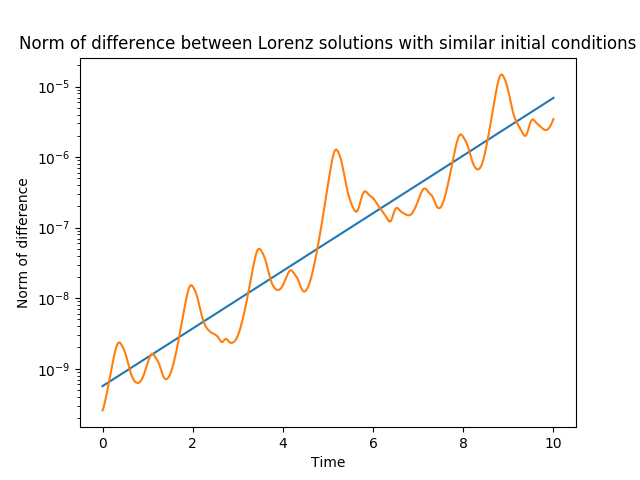

In [66]:
initial = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
initiald = initial - np.random.randn(3)*(1e-10)


lmbda = np.linspace(0,10,400)
vals = odeint(lorenz,initial,lmbda)
#solve random initial conditions then use the last value as the starting point for the ones we'll acutally use
newinit = vals[-1]
newinit2 = newinit - np.random.randn(3)*(1e-10)
vals = odeint(lorenz,newinit,lmbda)
vald = odeint(lorenz,newinit2,lmbda)
#get the norm of the difference between the solutions
norm = np.linalg.norm(vals-vald,axis=1)
newlog = linregress(lmbda,np.log(norm))
domain = np.exp(newlog[0]*lmbda+newlog[1])
plt.semilogy(lmbda,domain)
plt.semilogy(lmbda,norm)
plt.title("Norm of difference between Lorenz solutions with similar initial conditions")
plt.xlabel("Time")
plt.ylabel("Norm of difference")
plt.show()